In [1]:
# instalación de librerias y/o modulos

## Scipy
### Bajo pip -- python -m pip install scipy
### Bajo Conda -- conda install scipy

## sqlalchemy
### Bajo pip -- pip install SQLAlchemy
###             pip install sqlalchemy-utils

### Bajo Conda conda install -c anaconda sqlalchemy
###            conda install -c conda-forge sqlalchemy-utils
## Informacion del sistema
###             pip install sinfo

### streamlit
##  pip install streamlit


In [2]:

# Importaciones
import pandas as pd
import numpy as np
import funciones as fx
from matplotlib import pyplot as plt
import seaborn as sns
from sinfo import sinfo

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor

from lazypredict.Supervised import LazyRegressor
import pickle

sns.set(rc = {'figure.figsize':(20,12)})

In [3]:
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
funciones   NA
lazypredict 0.2.12
matplotlib  3.5.3
numpy       1.21.5
pandas      1.4.4
seaborn     0.12.1
sinfo       0.3.4
sklearn     1.1.3
-----
IPython             7.31.1
jupyter_client      7.4.7
jupyter_core        4.11.2
jupyterlab          3.5.0
notebook            6.5.2
-----
Python 3.9.12 (main, Apr  5 2022, 01:53:17) [Clang 12.0.0 ]
macOS-10.16-x86_64-i386-64bit
8 logical CPU cores, i386
-----
Session information updated at 2023-03-05 11:30


In [4]:
help(fx.boxplot_graph)
help(fx.conexion_sqlalchemy)

Help on function boxplot_graph in module funciones:

boxplot_graph(X, Y, Title)
    definición: funcion que realiza muestra de graficos boxplot para visualizar los OUTLIERS del dateframe
     
    X: dataframe sin vetor objetivo
    Y: vector objetivo 
    Title: titulo de grafico
     
    retorno: retorna print de graficos boxplot

Help on function conexion_sqlalchemy in module funciones:

conexion_sqlalchemy()
    definición: conexion con bd postgres
         
    retorno: retorna conexion a bd



In [5]:
help(fx.create_database)

Help on function create_database in module sqlalchemy_utils.functions.database:

create_database(url, encoding='utf8', template=None)
    Issue the appropriate CREATE DATABASE statement.
    
    :param url: A SQLAlchemy engine URL.
    :param encoding: The encoding to create the database as.
    :param template:
        The name of the template from which to create the new database. At the
        moment only supported by PostgreSQL driver.
    
    To create a database, you can pass a simple URL that would have
    been passed to ``create_engine``. ::
    
        create_database('postgresql://postgres@localhost/name')
    
    You may also pass the url from an existing engine. ::
    
        create_database(engine.url)
    
    Has full support for mysql, postgres, and sqlite. In theory,
    other database engines should be supported.



In [6]:

help(fx.graph)
help(fx.boxplot_graph)

Help on function graph in module funciones:

graph(dataframe, rows=1, cols=1)
    definición: funcion que realiza graficos de un dataset enviado como paramtero
         
    dataframe: set de datos a graficar
    
    retorno: retorna print de series del dataframe

Help on function boxplot_graph in module funciones:

boxplot_graph(X, Y, Title)
    definición: funcion que realiza muestra de graficos boxplot para visualizar los OUTLIERS del dateframe
     
    X: dataframe sin vetor objetivo
    Y: vector objetivo 
    Title: titulo de grafico
     
    retorno: retorna print de graficos boxplot



In [7]:
help(fx.selectViewComplete)
help(fx.selectViewTest)

Help on function selectViewComplete in module funciones:

selectViewComplete(conn)
    definición: funcion que realiza consulta select a vista desde postgres
     
    conn: conexion base de datos postgres
     
    retorno: retorna la consulta select de los datos completos

Help on function selectViewTest in module funciones:

selectViewTest(conn)
    definición: funcion que realiza consulta select a vista desde postgres
     
    conn: conexion base de datos postgres
     
    retorno: retorna la consulta select de los datos de test convertidos en dataframe



In [8]:
help(fx.selectViewTrain)
help(fx.report_metrics)

Help on function selectViewTrain in module funciones:

selectViewTrain(conn)
    definición: funcion que realiza consulta select a vista desde postgres
    
    conn: conexion base de datos postgres
    
    retorno: retorna la consulta select de los datos de train convertidos en dataframe

Help on function report_metrics in module funciones:

report_metrics(model, dataframeTrain, dataframeTest, vector_objetivo, titulo, modelo, segmento, key, list_model_result, df_Predict)
    definición: funcion que realiza print de metricas segun modelo envaido como parametro
     
    model: Modelo regresion 
    dataframeTrain: muestra de train
    dataframeTest: muestra de test
    vector_objetivo: columna a evaluar como vector objetivo
    titulo: titulo de print
    list_model_result: diccionario que guardara lista de modelos
    
    retorno: retorna print de metricas



In [9]:
# Conexión a BD PostgreSQL
conn = fx.conexion_sqlalchemy()

#### Preparación del ambiente de trabajo desde Bd postgres

In [10]:
# Creación de dataset de entrenamiento, testeo y EDA mediante función, la cual se conecta a BD PostgreSQL
df_train = fx.selectViewTrain(conn)
df_test = fx.selectViewTest(conn)
#df_complete = fx.selectViewComplete(conn)

#### Visualizacion general dataframe

In [11]:
df_train.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE1F52DE012636,2013,10888,19606,Long Island City,8923,NY,41,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
1,2,19VDE1F71EE003817,2014,10999,39922,Windsor,10156,CO,8,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
2,3,19UDE2F32GA001284,2016,14799,22142,Lindon,8893,UT,52,Acura,...,1229,4,gasoline,6,2359.74,144.00,4,8,generalista,1
3,4,JH4CU2F83CC019895,2012,7989,105246,Miami,9057,FL,13,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,JH4CU2F64DC006203,2013,13995,32384,West Jordan,10092,UT,52,Acura,...,2393,4,gasoline,6,2359.74,144.00,4,5,generalista,1


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617168 entries, 0 to 617167
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       617168 non-null  int64  
 1   Vin                      617168 non-null  object 
 2   Year                     617168 non-null  int64  
 3   Price                    617168 non-null  int64  
 4   Mileage                  617168 non-null  int64  
 5   City                     617168 non-null  object 
 6   City_Id                  617168 non-null  int64  
 7   State                    617168 non-null  object 
 8   State_Id                 617168 non-null  int64  
 9   Make                     617168 non-null  object 
 10  Make_Id                  617168 non-null  int64  
 11  Model                    617168 non-null  object 
 12  Model_Id                 617168 non-null  int64  
 13  Doors                    617168 non-null  int64  
 14  Fuel

In [13]:
df_test.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE2E53EE000083,2014,8995,35725,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
1,2,19VDE2E52DE000025,2013,8995,48851,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
2,3,JH4CU2F84EC002686,2014,14490,34032,Greatneck,8550,NY,41,Acura,...,2397,4,gasoline,6,2359.74,144.00,4,5,generalista,1
3,4,JH4CU2F44CC003220,2012,12921,58550,Boise,7867,ID,19,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,19VDE1F31EE009243,2014,14995,23454,Hackettstown,8583,NJ,38,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205709 entries, 0 to 205708
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       205709 non-null  int64  
 1   Vin                      205709 non-null  object 
 2   Year                     205709 non-null  int64  
 3   Price                    205709 non-null  int64  
 4   Mileage                  205709 non-null  int64  
 5   City                     205709 non-null  object 
 6   City_Id                  205709 non-null  int64  
 7   State                    205709 non-null  object 
 8   State_Id                 205709 non-null  int64  
 9   Make                     205709 non-null  object 
 10  Make_Id                  205709 non-null  int64  
 11  Model                    205709 non-null  object 
 12  Model_Id                 205709 non-null  int64  
 13  Doors                    205709 non-null  int64  
 14  Fuel

#### Division de dataframe segun rango de precios

In [15]:
listfiltro_datos = ['Year','Price','Mileage','State_Id','Make_Id','Model_Id'
                    ,'Engine_Displacement_CC','Engine_Number_Cylinders']

#'Doors', 'Fuel_Id', 'Transmission_Speeds' 'Engine_Displacement_CI', 'City_Id',

In [16]:
##dividir dataset segun gama('generalista, premium, super-premium')

df_test_generalista = df_test[df_test.Gama == 'generalista']
df_test_generalista = df_test_generalista[listfiltro_datos]
#df_test_generalista.select_dtypes(include='number')

df_test_premium1 = df_test[df_test.Gama == 'premium_1']
df_test_premium1 = df_test_premium1[listfiltro_datos]

df_test_premium2 = df_test[df_test.Gama == 'premium_2']
df_test_premium2 = df_test_premium2[listfiltro_datos]

df_test_premium3 = df_test[df_test.Gama == 'premium_3']
df_test_premium3 = df_test_premium3[listfiltro_datos]

df_test_premium4 = df_test[df_test.Gama == 'premium_4']
df_test_premium4 = df_test_premium4[listfiltro_datos]

df_test_premium5 = df_test[df_test.Gama == 'premium_5']
df_test_premium5 = df_test_premium5[listfiltro_datos]

df_test_premium6 = df_test[df_test.Gama == 'premium_6']
df_test_premium6 = df_test_premium6[listfiltro_datos]

df_test_premium7 = df_test[df_test.Gama == 'premium_7']
df_test_premium7 = df_test_premium7[listfiltro_datos]

df_test_premium8 = df_test[df_test.Gama == 'premium_8']
df_test_premium8 = df_test_premium8[listfiltro_datos]


In [17]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_train_generalista = df_train[df_train.Gama == 'generalista']
df_train_generalista = df_train_generalista[listfiltro_datos]

df_train_premium1 = df_train[df_train.Gama == 'premium_1']
df_train_premium1 = df_train_premium1[listfiltro_datos]

df_train_premium2 = df_train[df_train.Gama == 'premium_2']
df_train_premium2 = df_train_premium2[listfiltro_datos]

df_train_premium3 = df_train[df_train.Gama == 'premium_3']
df_train_premium3 = df_train_premium3[listfiltro_datos]

df_train_premium4 = df_train[df_train.Gama == 'premium_4']
df_train_premium4 = df_train_premium4[listfiltro_datos]

df_train_premium5 = df_train[df_train.Gama == 'premium_5']
df_train_premium5 = df_train_premium5[listfiltro_datos]

df_train_premium6 = df_train[df_train.Gama == 'premium_6']
df_train_premium6 = df_train_premium6[listfiltro_datos]

df_train_premium7 = df_train[df_train.Gama == 'premium_7']
df_train_premium7 = df_train_premium7[listfiltro_datos]

df_train_premium8 = df_train[df_train.Gama == 'premium_8']
df_train_premium8 = df_train_premium8[listfiltro_datos]

In [18]:
df_test_generalista

,Year,Price,Mileage,State_Id,Make_Id,Model_Id,Engine_Displacement_CC,Engine_Number_Cylinders
0,2014,8995,35725,51,1,1227,2354.00,4
1,2013,8995,48851,51,1,1227,2354.00,4
2,2014,14490,34032,41,1,2397,2359.74,4
3,2012,12921,58550,19,1,2394,2359.74,4
4,2014,14995,23454,38,1,1226,1997.00,4
...,...,...,...,...,...,...,...,...
205598,2011,24995,42340,46,58,2601,3192.00,6
205599,2013,24000,67696,38,58,2599,3200.00,6
205616,2014,24423,71973,47,58,2595,3000.00,6
205619,2015,24988,23871,13,58,2436,2000.00,4


#### Analisis Exploratorio

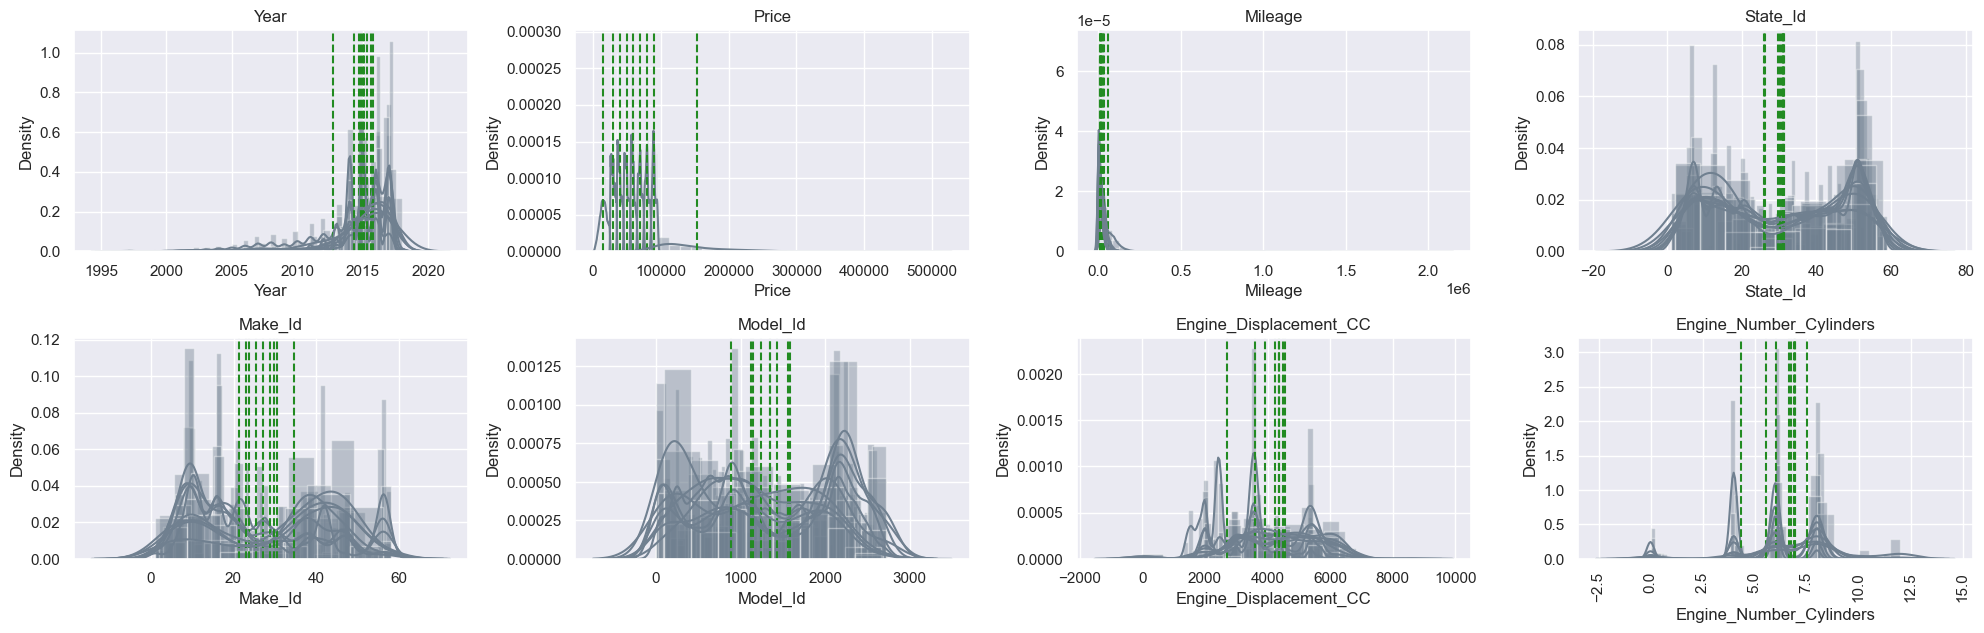

In [19]:
rows = 4
cols = 4
list_make = [df_test_generalista, df_test_premium1, df_test_premium2, df_test_premium3, df_test_premium4
             , df_test_premium5, df_test_premium6, df_test_premium7, df_test_premium8]

for index, value in enumerate(list_make):
    df_test_obj = value
    #df_test_obj = value[["Price"]]    
    fx.graph(df_test_obj, rows, cols)

<AxesSubplot:xlabel='Price', ylabel='Make'>

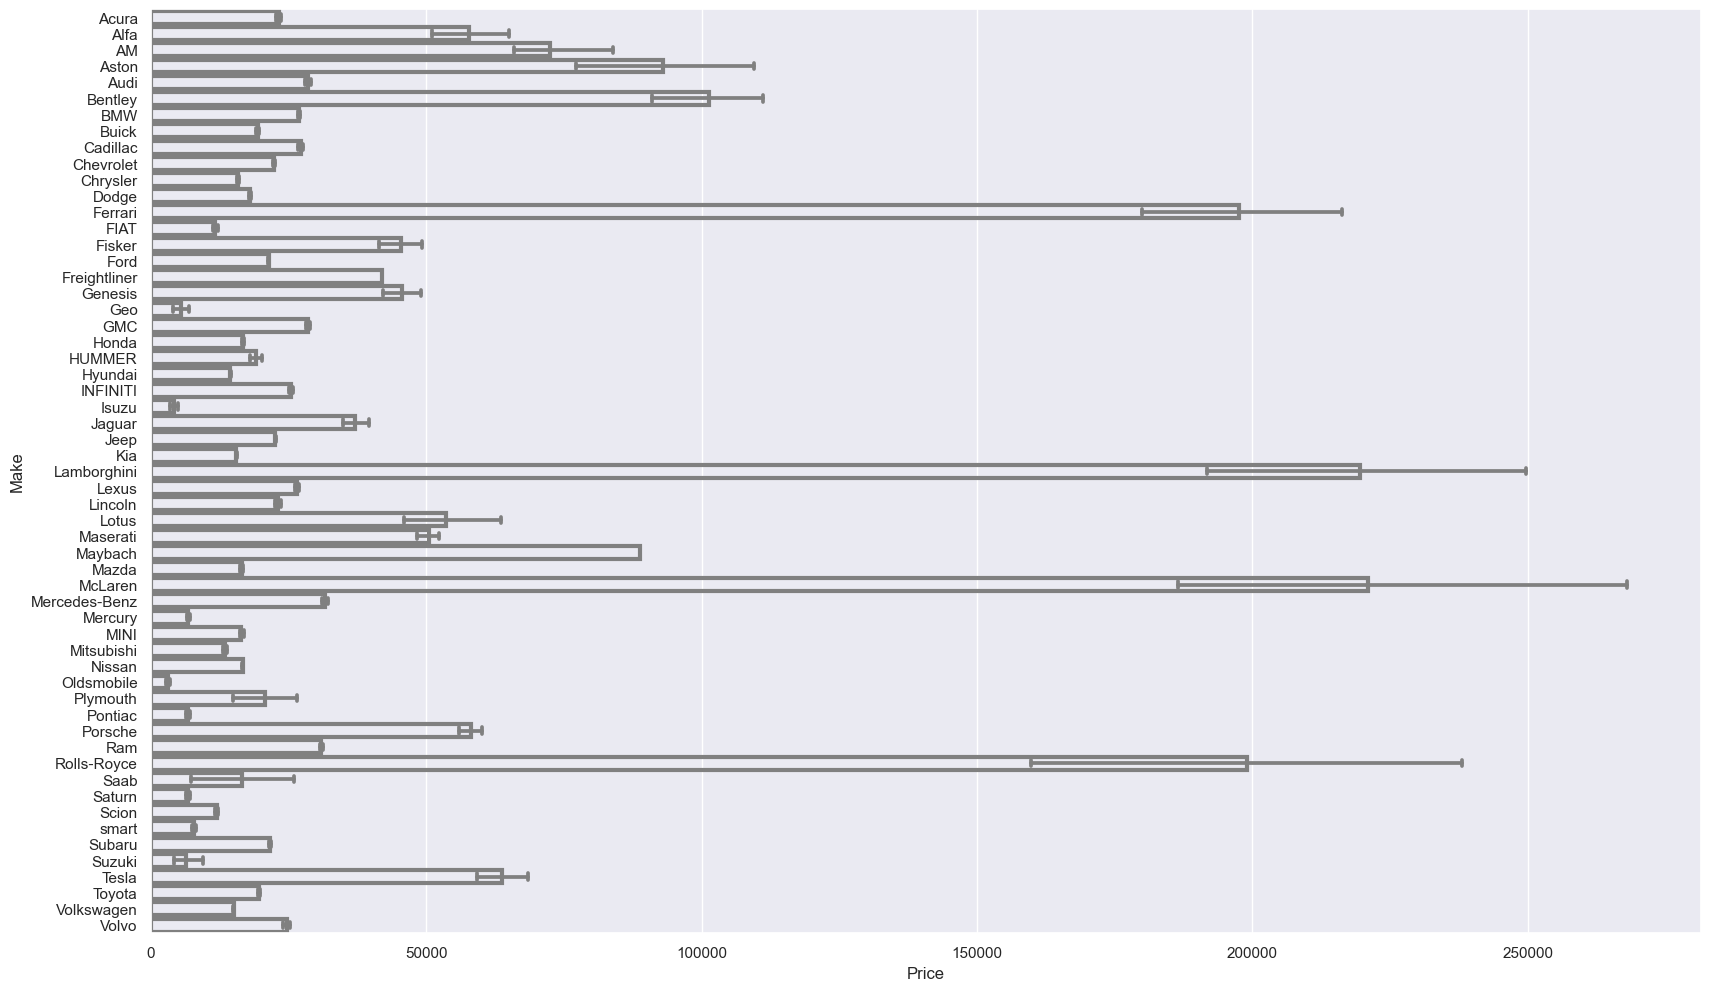

In [20]:
X = df_test.Price
Y = df_test.Make
sns.barplot(
    data=df_test, x=X, y=Y,
    capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

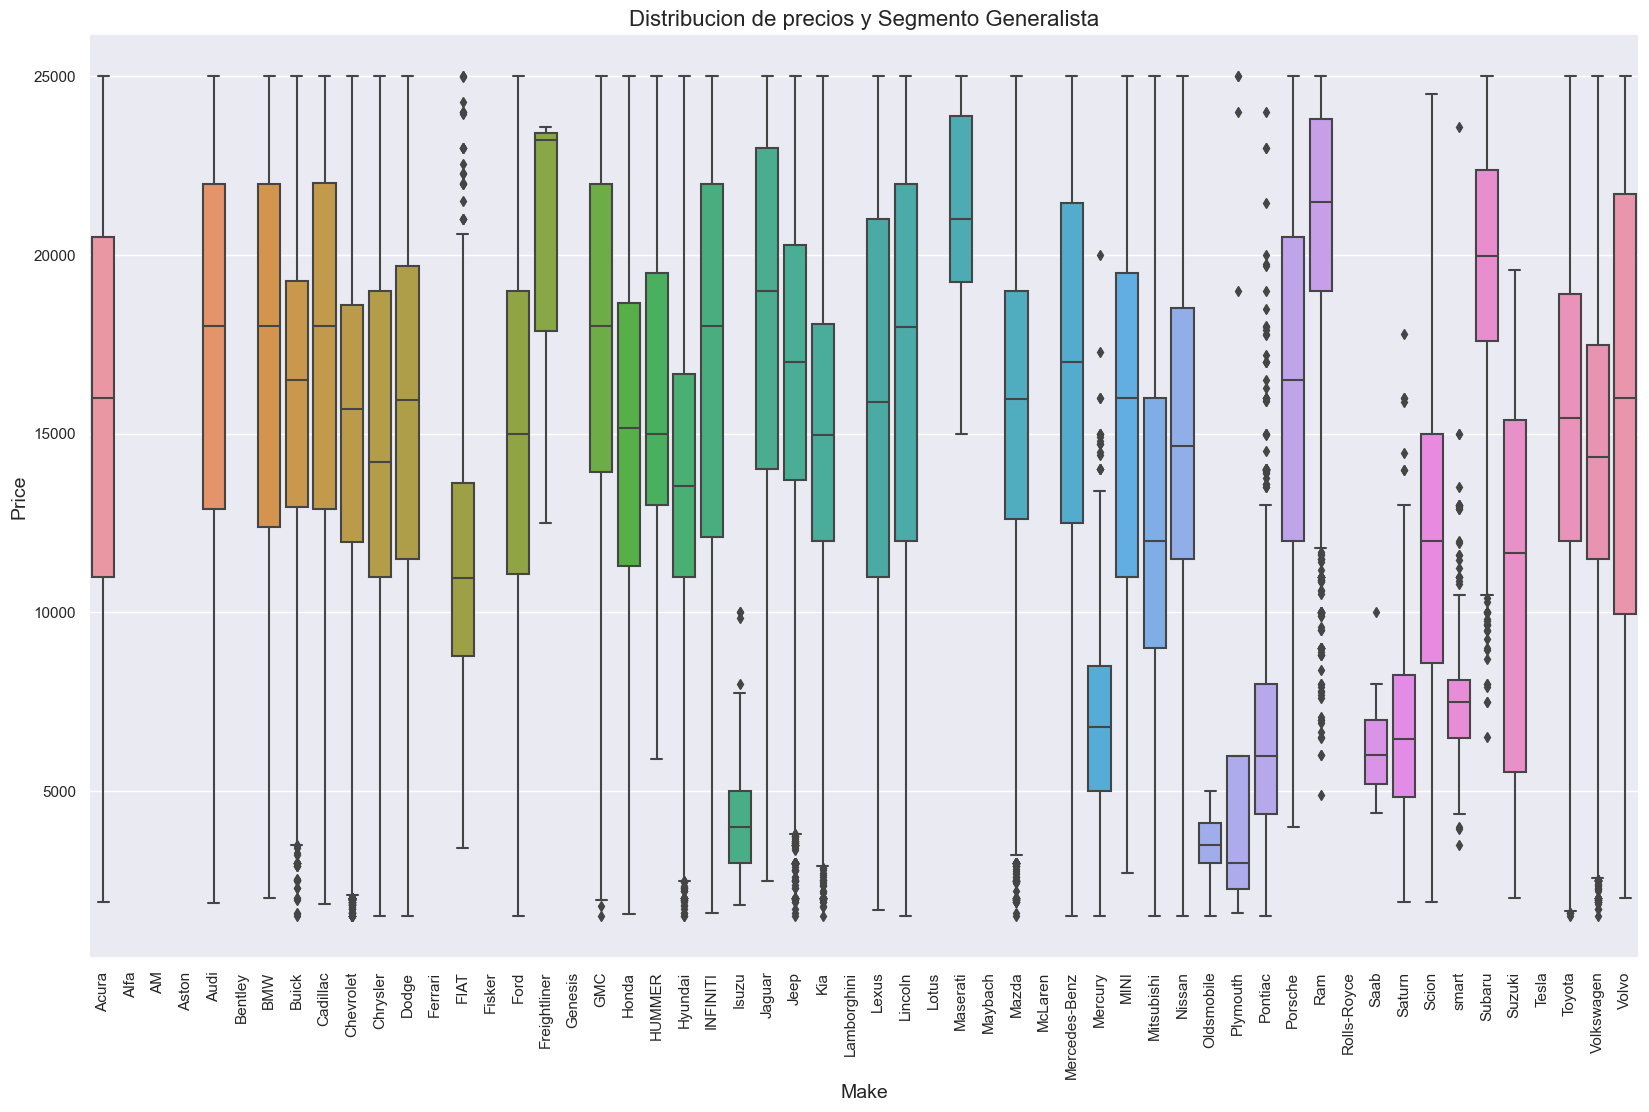

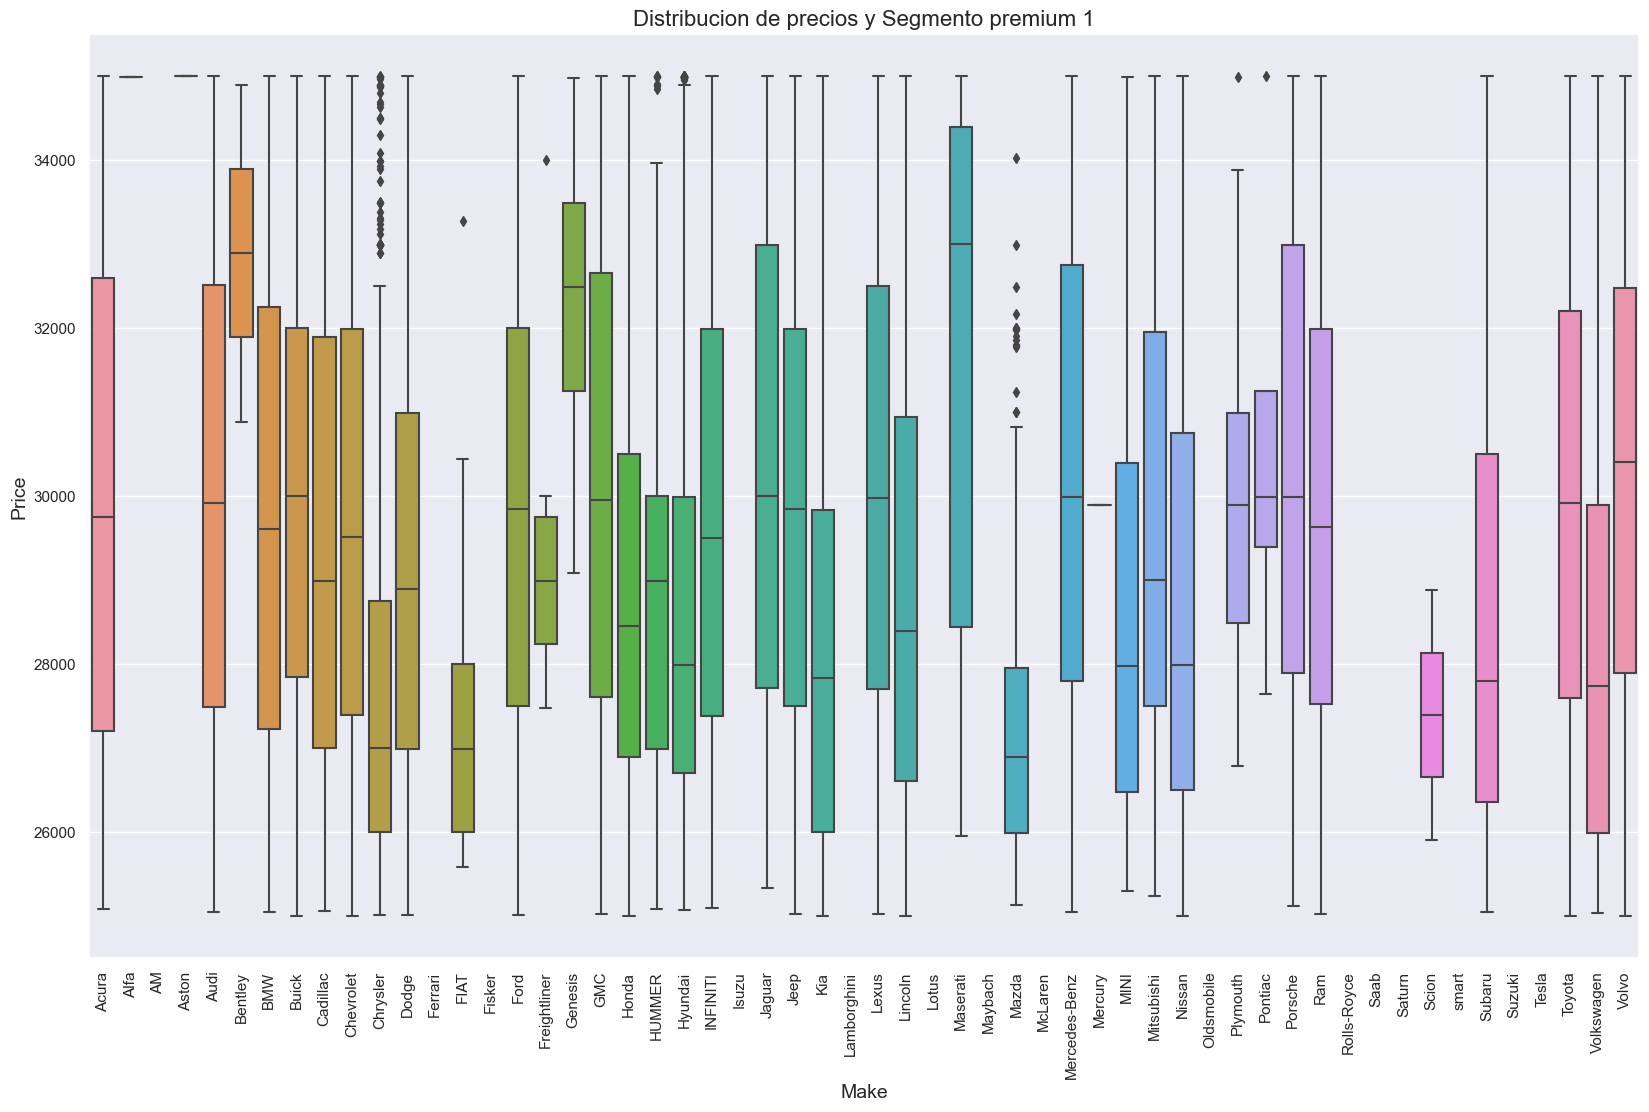

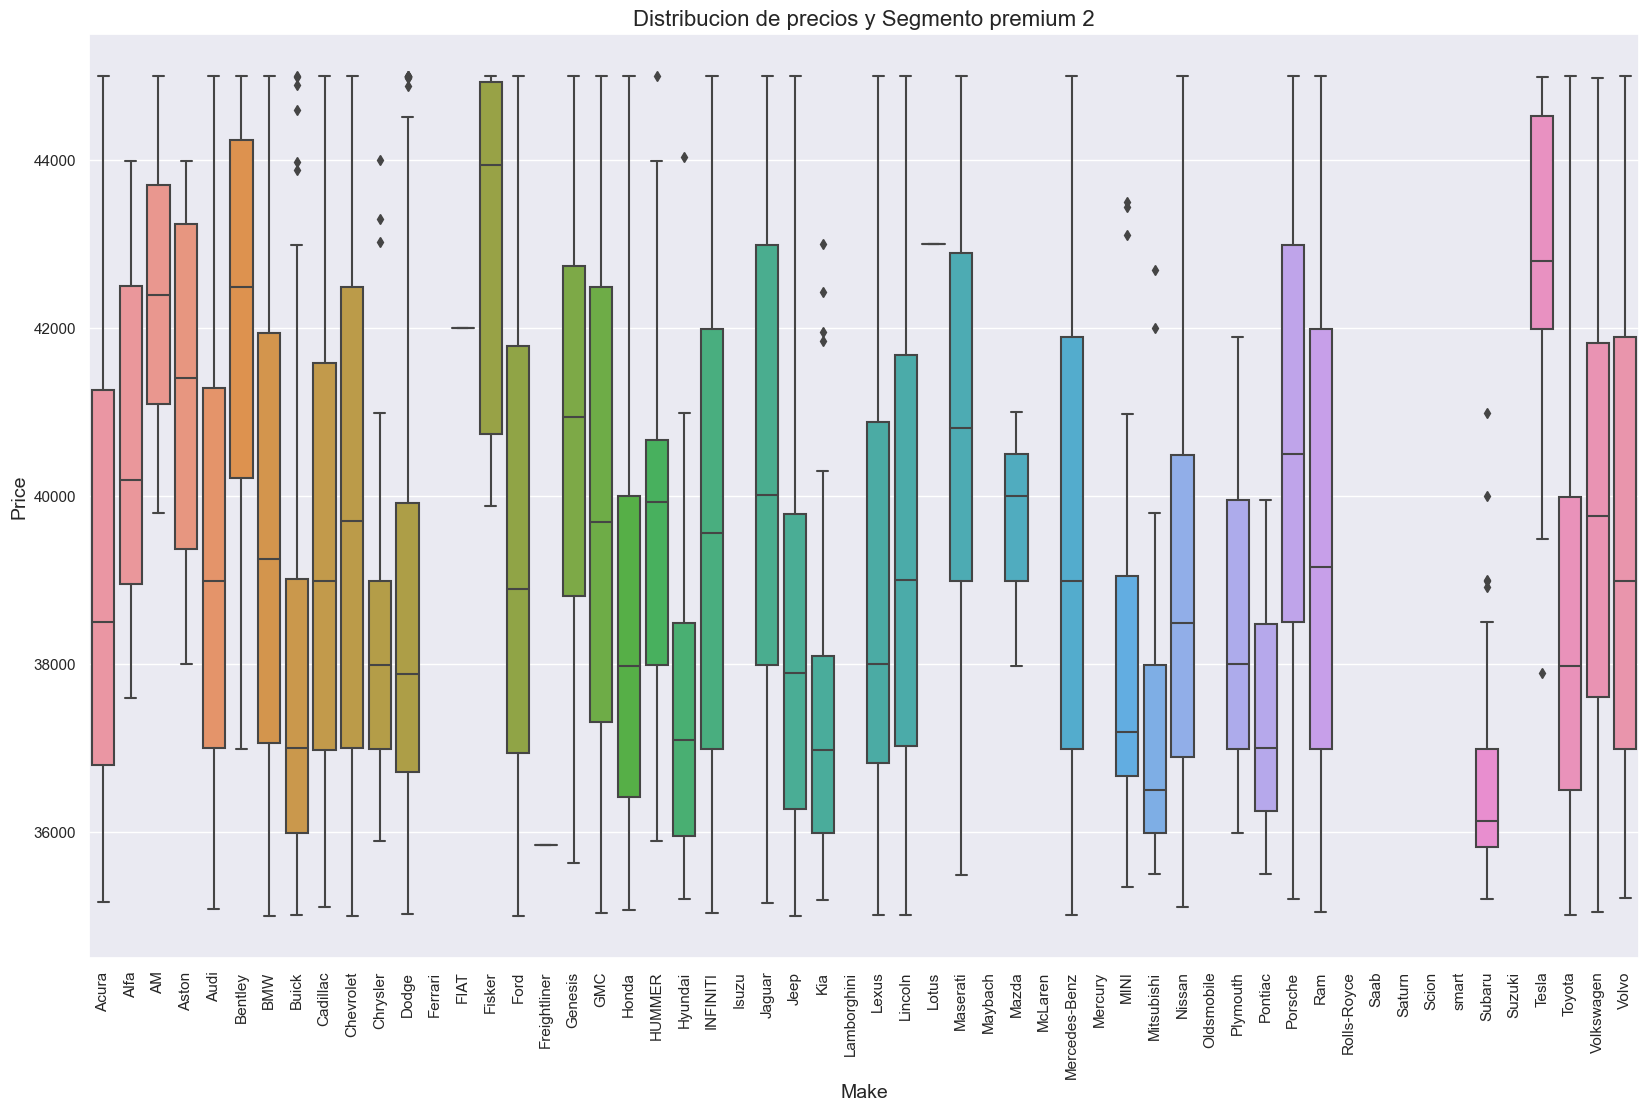

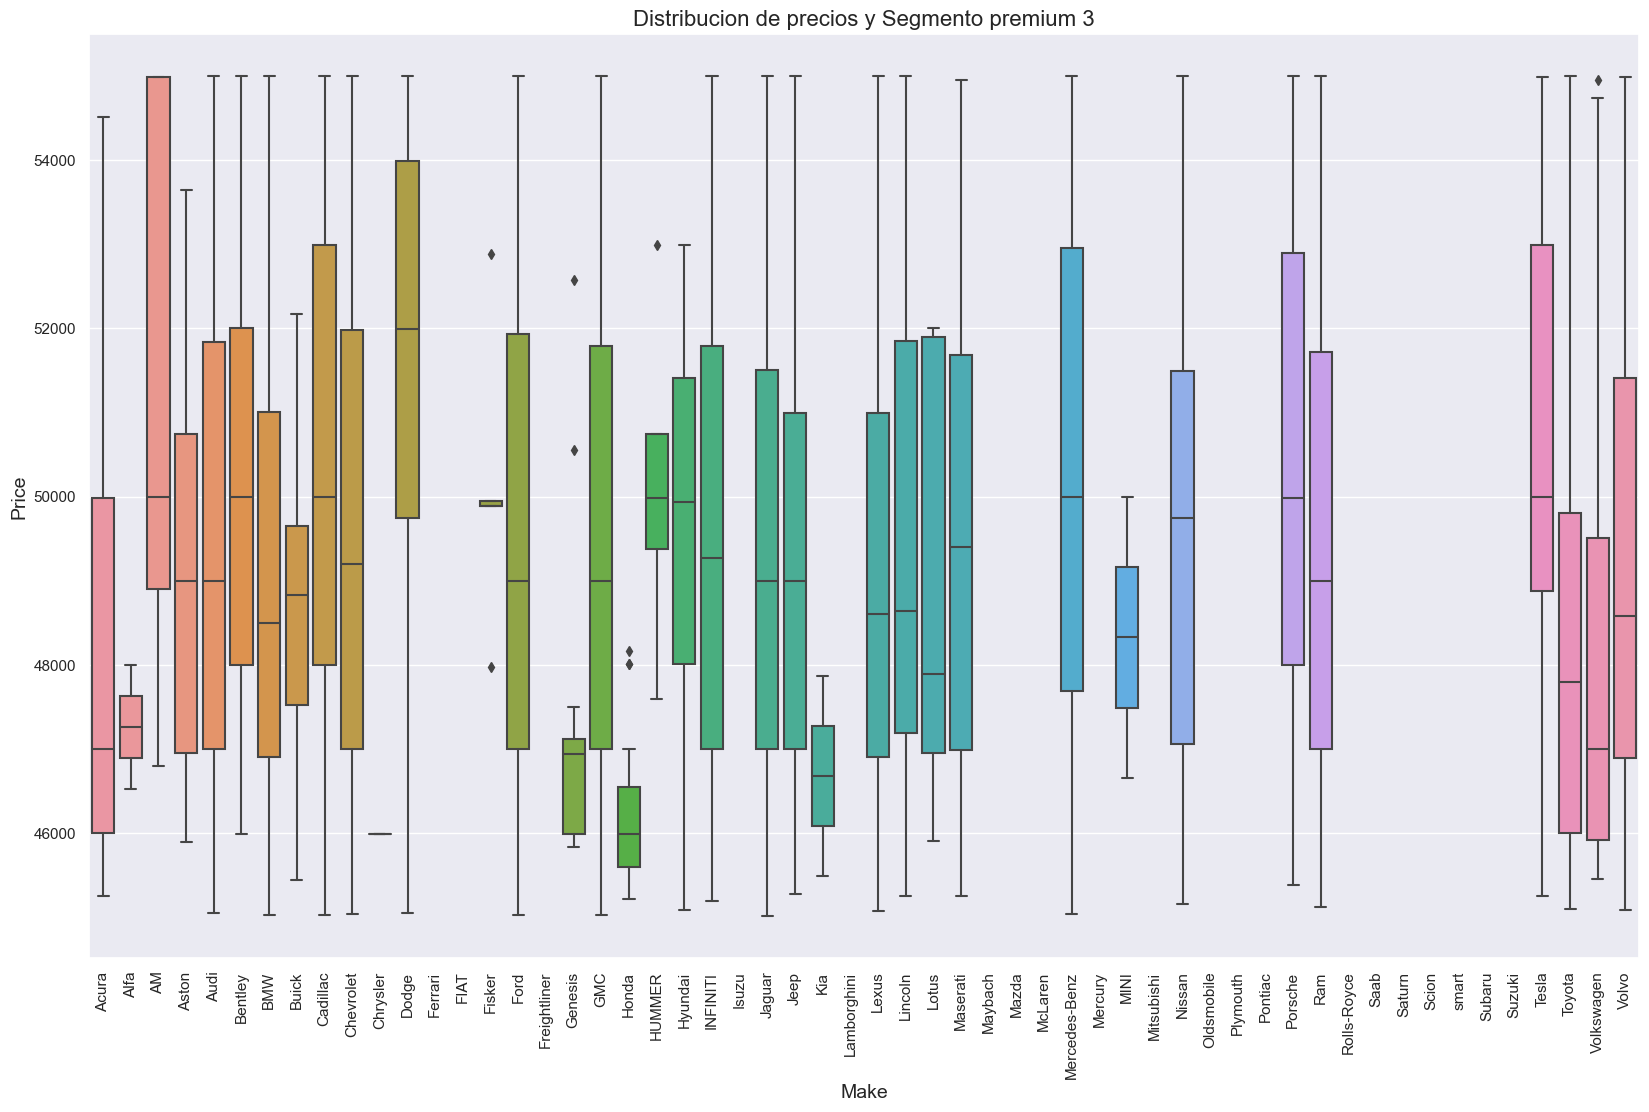

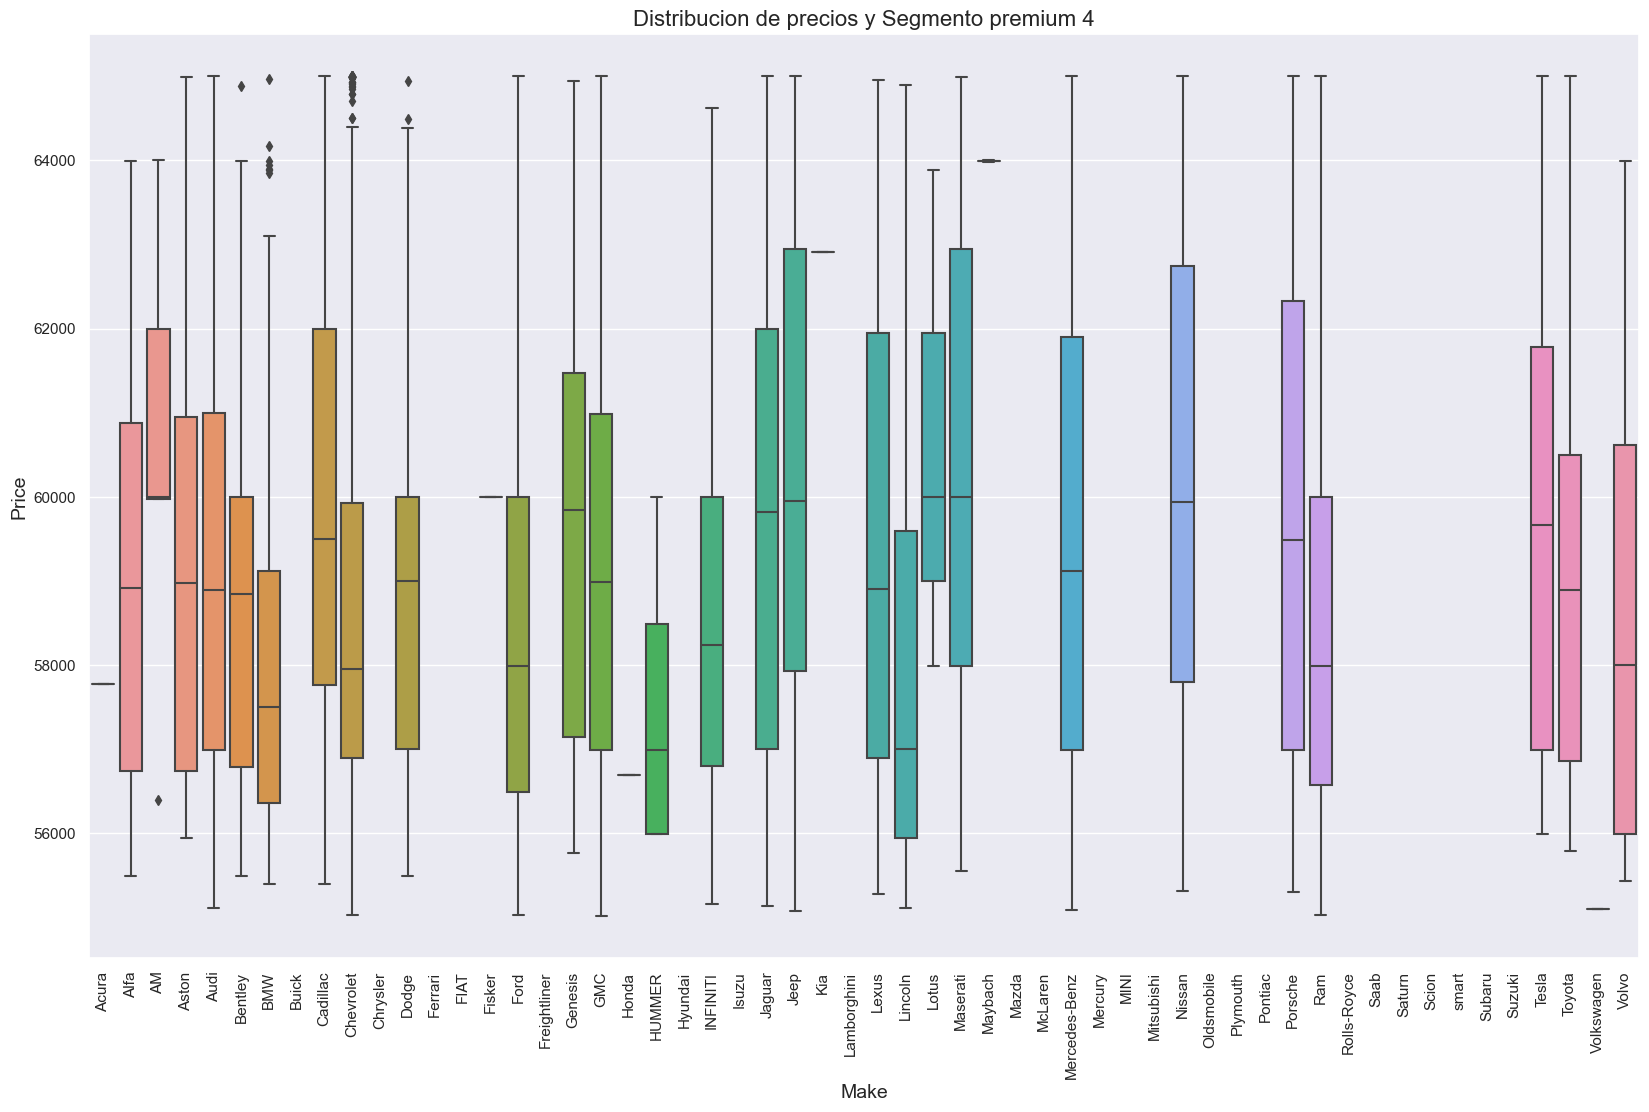

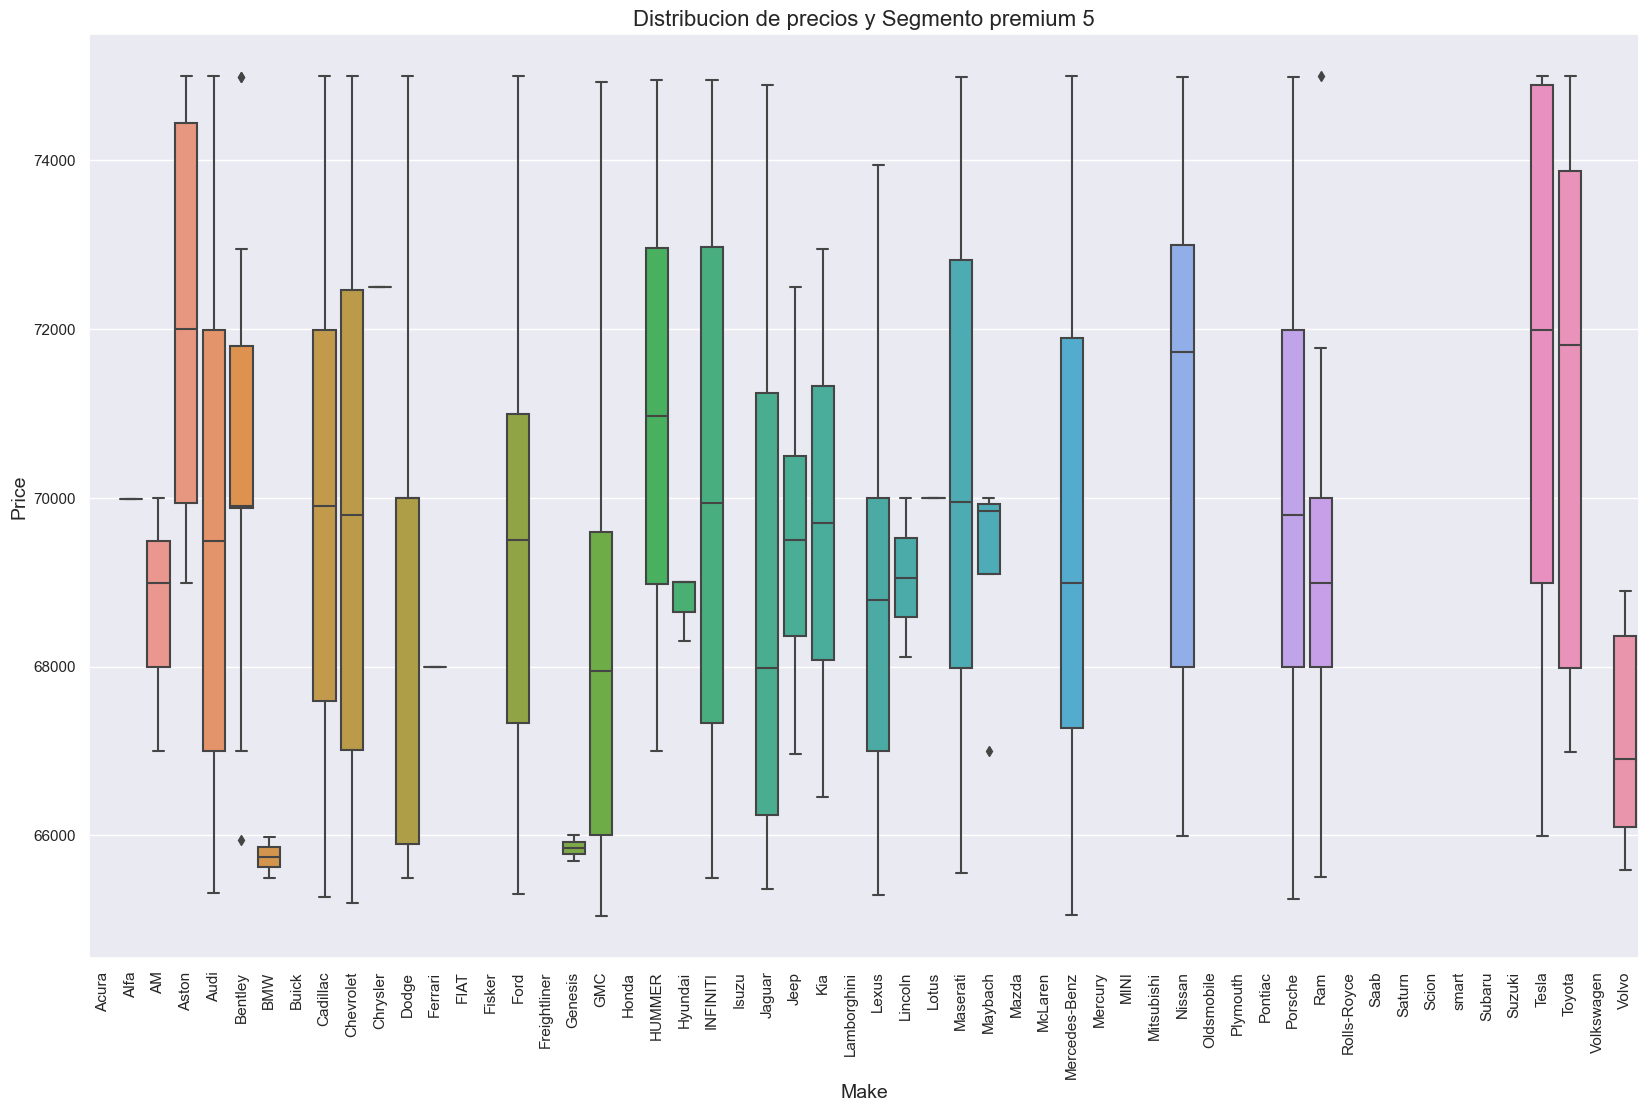

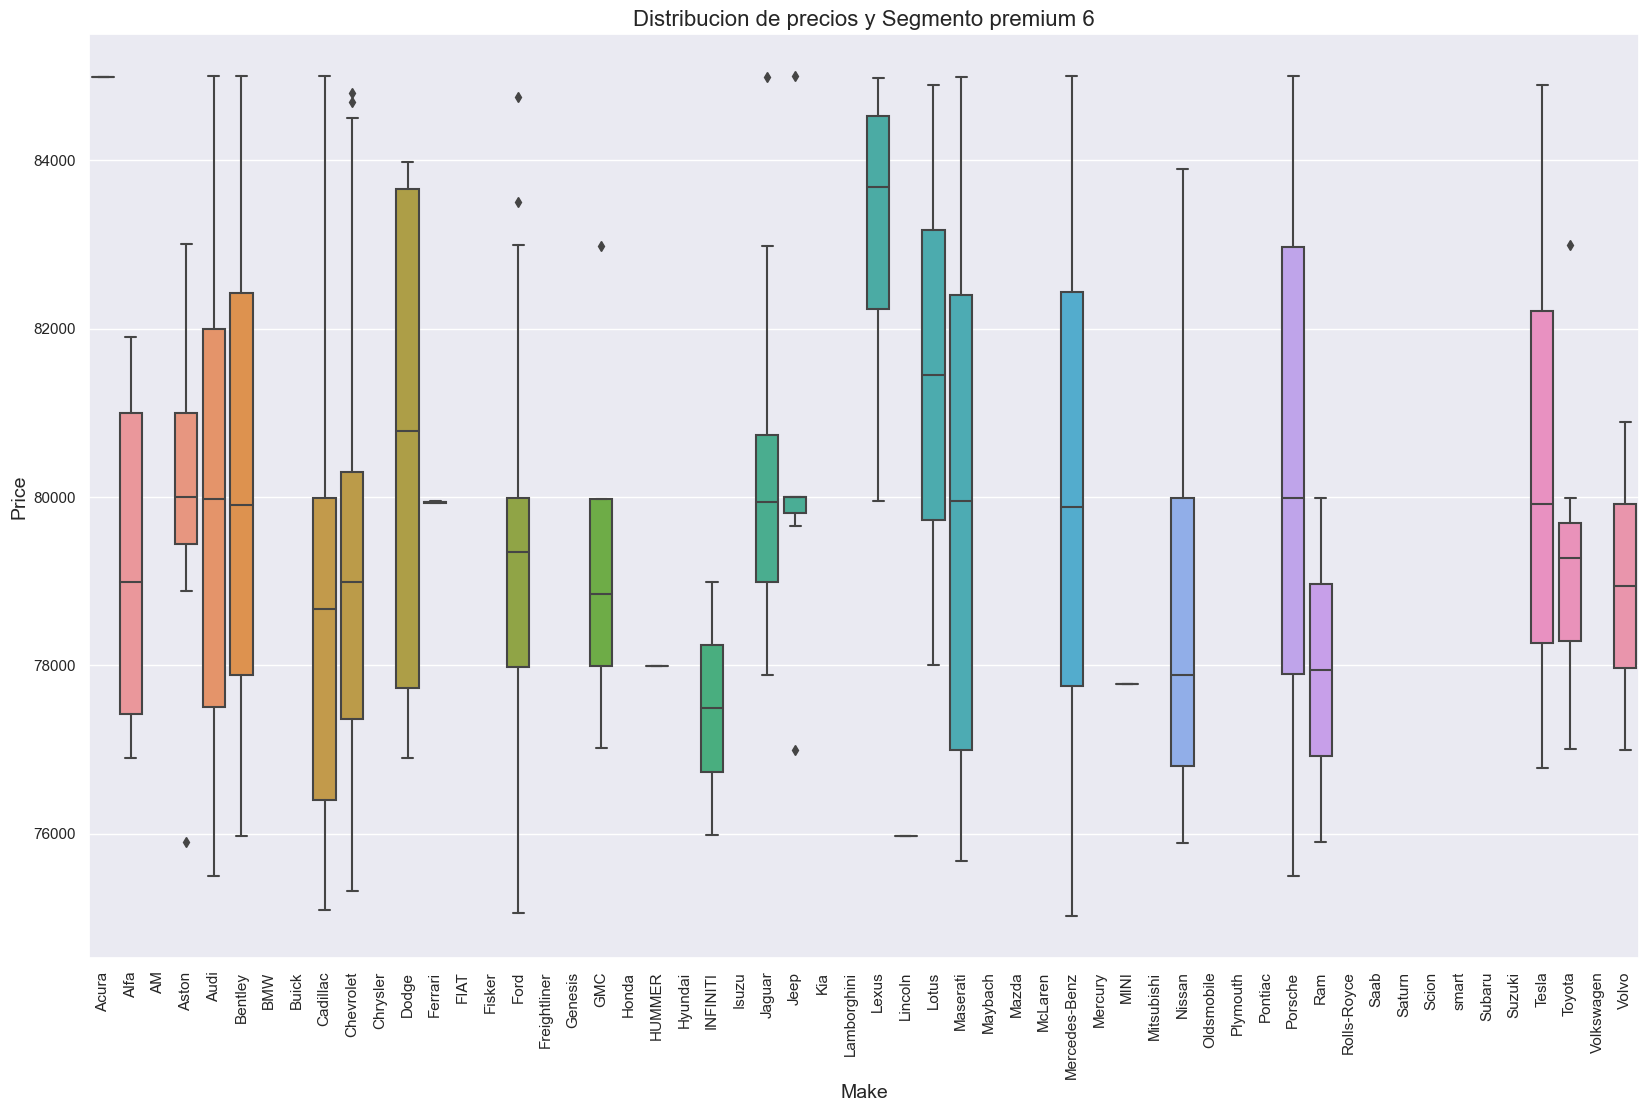

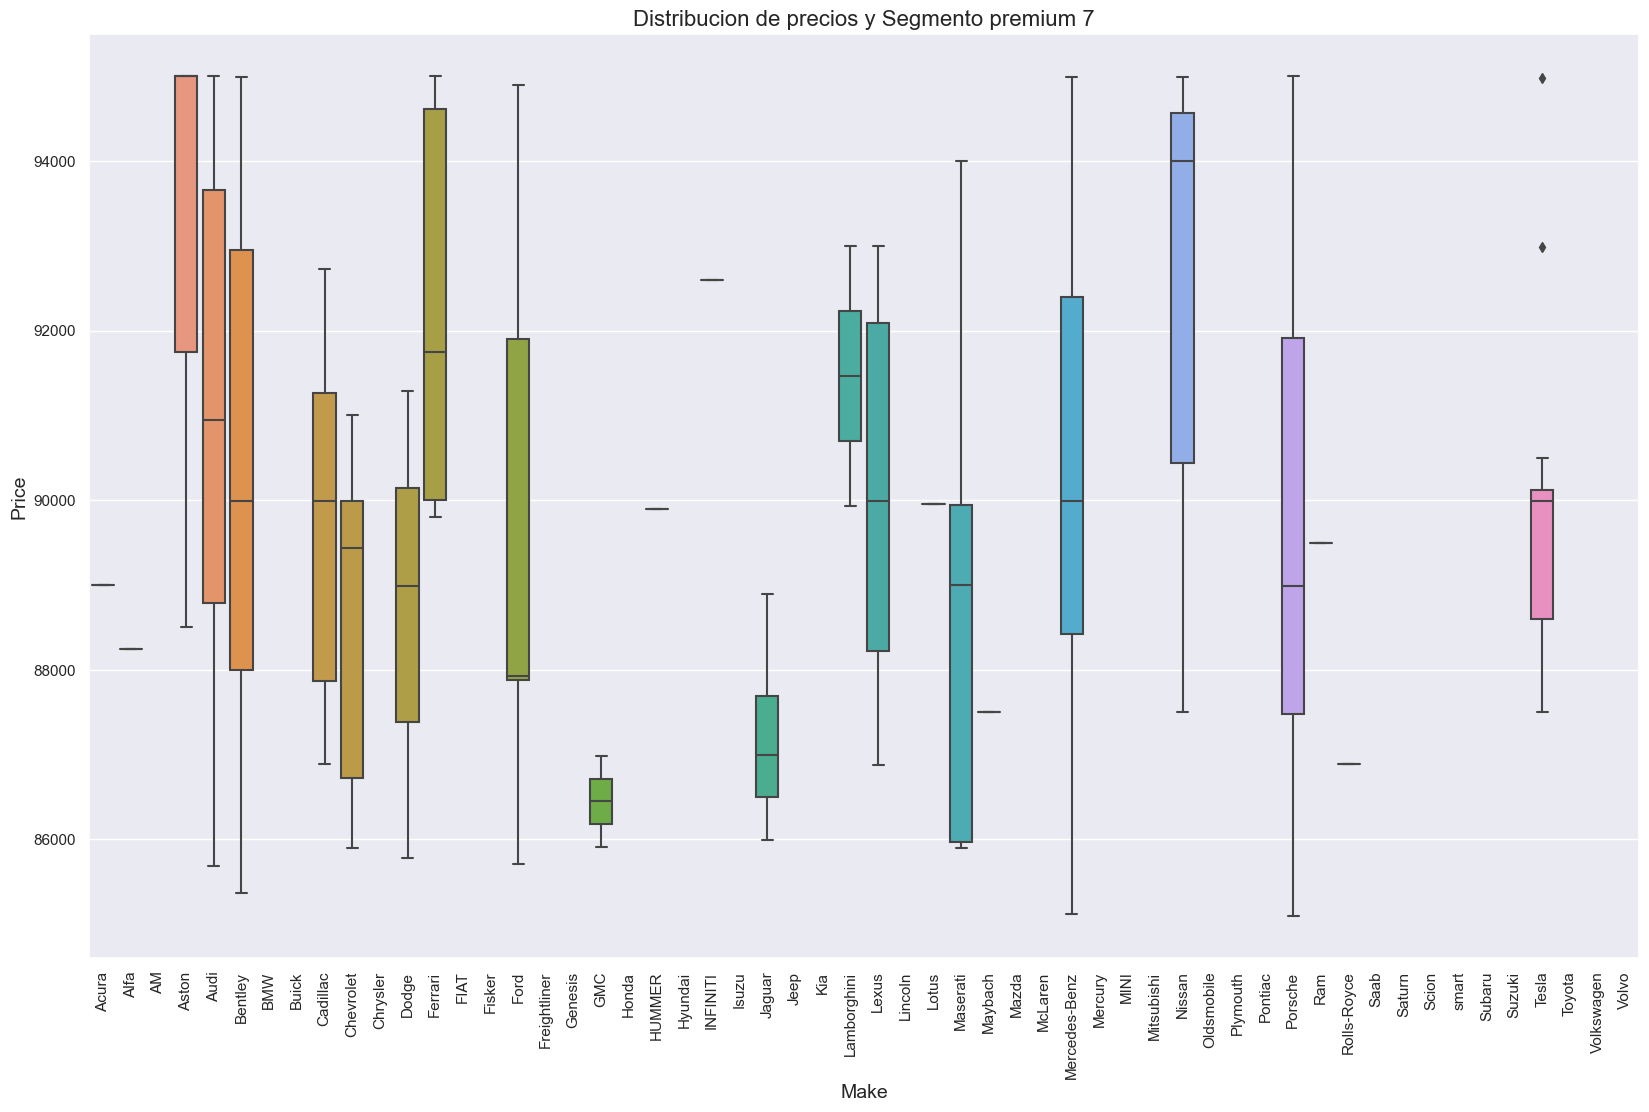

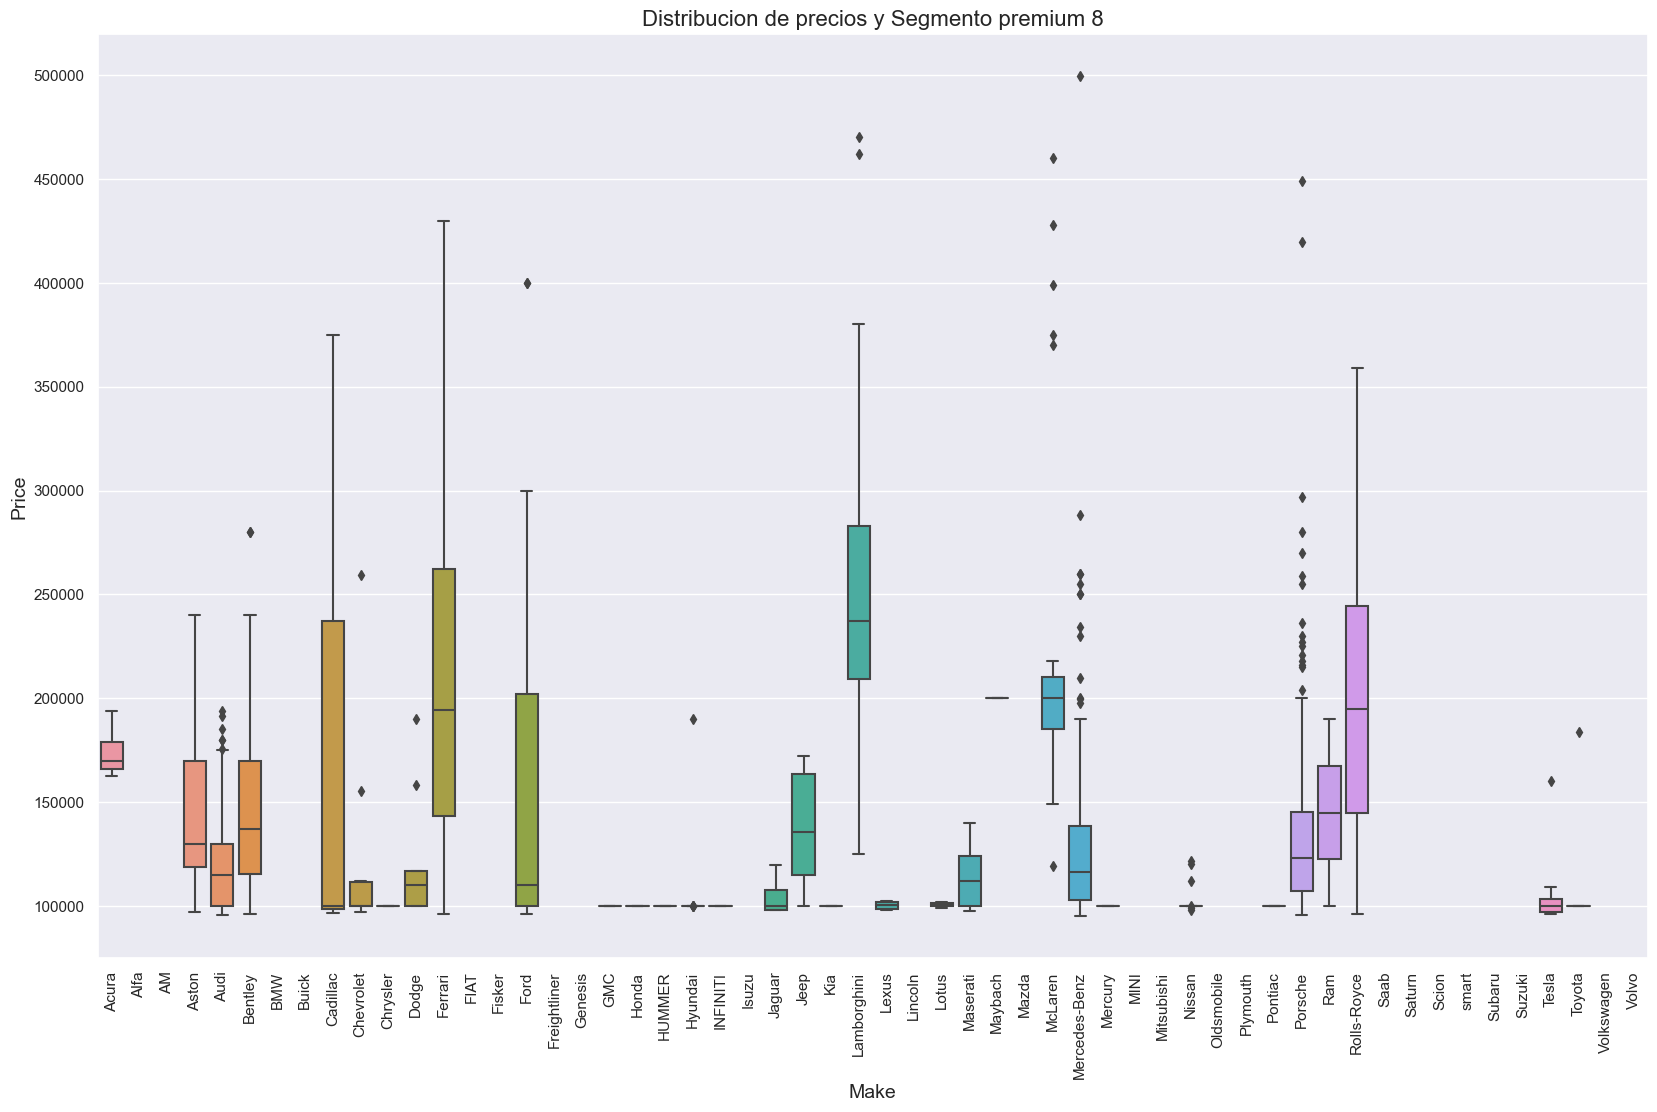

In [21]:
list_bxplot = []
list_bxplot = [df_train_generalista['Price'], df_train_premium1['Price'], df_train_premium2['Price'], df_train_premium3['Price']
               ,df_train_premium4['Price'], df_train_premium5['Price'], df_train_premium6['Price'], df_train_premium7['Price']
               ,df_train_premium8['Price']]

for index, value in enumerate(list_bxplot):
    title = ''
    if index == 0:
        title = 'Distribucion de precios y Segmento Generalista'
    else:
        title = f'Distribucion de precios y Segmento premium {index}'   

    #print(value)
    fx.boxplot_graph(df_train['Make'], value, title)

## Entrenamiento Modelos 

In [22]:
list_dt = []
list_dt = [[df_train_generalista, df_test_generalista], [df_train_premium1, df_test_premium1]
           ,[df_train_premium2, df_test_premium2], [df_train_premium3, df_test_premium3]
           ,[df_train_premium4, df_test_premium4], [df_train_premium5, df_test_premium5]
           ,[df_train_premium6, df_test_premium6], [df_train_premium7, df_test_premium7]
           ,[df_train_premium8, df_test_premium8]]

list_model_result = dict()
df_Predict = pd.DataFrame()

#### LazyPredict => LazyRegressor

#### se aplicara LazyRegressor de la libreria LazyPredict para ayudarnos a comprender que modelos funcionan mejor sin ningun ajuste de parametros.

In [23]:
X_train_model_lazy = df_train_premium8.drop(columns = ['Price'])
y_train_model_lazy = df_train_premium8['Price']

X_test_model_lazy = df_test_premium8.drop(columns = ['Price'])
y_test_model_lazy = df_test_premium8['Price']

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_lazyRegressor, predictions = reg.fit(X_train_model_lazy, X_test_model_lazy, y_train_model_lazy, y_test_model_lazy)

100%|██████████| 42/42 [01:57<00:00,  2.79s/it]


In [24]:
models_lazyRegressor

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.68,0.69,38126.46,0.56
ExtraTreesRegressor,0.67,0.68,38648.87,0.36
BaggingRegressor,0.67,0.67,38884.68,0.06
HistGradientBoostingRegressor,0.66,0.66,39576.19,1.72
LGBMRegressor,0.65,0.66,39816.97,0.26
GradientBoostingRegressor,0.64,0.64,40741.22,0.18
XGBRegressor,0.62,0.62,41785.25,0.31
KNeighborsRegressor,0.56,0.56,45020.64,0.02
DecisionTreeRegressor,0.54,0.55,45667.69,0.02


#### GradientBoostingRegressor

In [25]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para GradientBoostingRegressor dataset generalista'
        key = f'GradientBoostingRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para GradientBoostingRegressor dataset premium {index}'    
        key = f'GradientBoostingRegressor_premium_{index}'
        segmento = f'premium_{index}'
      
    list_model_result, df_Predict = fx.report_metrics(GradientBoostingRegressor(random_state=11238), value[0], 
                                                    value[1], 'Price', title, "GradientBoostingRegressor", segmento, 
                                                    key, list_model_result, df_Predict)
    
    print('=============================================================')
    print('\n')

Reporte para GradientBoostingRegressor dataset generalista
    RMSE: 2779.266882002836
    MAE: 1827.5815165198583
    R2 Score: 0.7161060948479829


Reporte para GradientBoostingRegressor dataset premium 1
    RMSE: 2478.5850061705905
    MAE: 1943.2523840601098
    R2 Score: 0.23123333138947


Reporte para GradientBoostingRegressor dataset premium 2
    RMSE: 2563.557626981587
    MAE: 2007.789916419999
    R2 Score: 0.1817460596725985


Reporte para GradientBoostingRegressor dataset premium 3
    RMSE: 2616.6630057930793
    MAE: 2041.7256099307851
    R2 Score: 0.15280658867270802


Reporte para GradientBoostingRegressor dataset premium 4
    RMSE: 2433.3486959409943
    MAE: 1745.269130906432
    R2 Score: 0.16776689028915903


Reporte para GradientBoostingRegressor dataset premium 5
    RMSE: 2655.9734878444433
    MAE: 2011.1710026613146
    R2 Score: 0.0889152397529055


Reporte para GradientBoostingRegressor dataset premium 6
    RMSE: 2785.5756425972327
    MAE: 2068.82939983

#### RandomForestRegressor     

In [26]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para RandomForestRegressor dataset generalista'
        key = 'RandomForestRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para RandomForestRegressor dataset premium {index}'    
        key = f'RandomForestRegressor_premium_{index}'
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(RandomForestRegressor(random_state=11238), value[0], 
                                                      value[1], 'Price', title, "RandomForestRegressor", segmento, key,
                                                      list_model_result, df_Predict)
    print('=============================================================')
    print('\n')

Reporte para RandomForestRegressor dataset generalista
    RMSE: 2013.3338619823867
    MAE: 1130.7999999999993
    R2 Score: 0.8510202778348638


Reporte para RandomForestRegressor dataset premium 1
    RMSE: 2277.673613082253
    MAE: 1452.824999999999
    R2 Score: 0.3508128870122508


Reporte para RandomForestRegressor dataset premium 2
    RMSE: 2473.332770041985
    MAE: 1599.7699999999968
    R2 Score: 0.23832966802797784


Reporte para RandomForestRegressor dataset premium 3
    RMSE: 2556.593439898874
    MAE: 1728.295000000002
    R2 Score: 0.19125739767075067


Reporte para RandomForestRegressor dataset premium 4
    RMSE: 2453.885042378922
    MAE: 1629.8199999999997
    R2 Score: 0.15366028263240894


Reporte para RandomForestRegressor dataset premium 5
    RMSE: 2713.364561445185
    MAE: 2008.2899999999936
    R2 Score: 0.04911585047631006


Reporte para RandomForestRegressor dataset premium 6
    RMSE: 2831.6986906554707
    MAE: 2159.415000000001
    R2 Score: -0.01595

#### AdaBoostRegressor

In [27]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para AdaBoostRegressor dataset generalista'
        key = 'AdaBoostRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para AdaBoostRegressor dataset premium {index}'
        key = f'AdaBoostRegressor_premium_{index}'
        segmento = f'premium_{index}' 
        
    list_model_result, df_Predict = fx.report_metrics(AdaBoostRegressor(random_state=11238), value[0], value[1], 
                                                      'Price', title, "AdaBoostRegressor", segmento, key, 
                                                      list_model_result, df_Predict)
       
    print('=============================================================')
    print('\n')

Reporte para AdaBoostRegressor dataset generalista
    RMSE: 3914.9980649805752
    MAE: 3022.810604533717
    R2 Score: 0.4366754640349696


Reporte para AdaBoostRegressor dataset premium 1
    RMSE: 2718.350030220197
    MAE: 2343.6509830276245
    R2 Score: 0.07530679667108608


Reporte para AdaBoostRegressor dataset premium 2
    RMSE: 2724.968046989525
    MAE: 2284.4206896551696
    R2 Score: 0.0754620033323764


Reporte para AdaBoostRegressor dataset premium 3
    RMSE: 2799.5905842051034
    MAE: 2337.0189761694637
    R2 Score: 0.030213734614117804


Reporte para AdaBoostRegressor dataset premium 4
    RMSE: 2584.7043169498606
    MAE: 2050.857260726072
    R2 Score: 0.06101634681848145


Reporte para AdaBoostRegressor dataset premium 5
    RMSE: 2738.529279773053
    MAE: 2268.816824966081
    R2 Score: 0.031396378528489644


Reporte para AdaBoostRegressor dataset premium 6
    RMSE: 2776.657306394683
    MAE: 2245.247422680419
    R2 Score: 0.02315689688987521


Reporte para

#### BaggingRegressor

In [28]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para BaggingRegressor dataset generalista'
        key = 'BaggingRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para BaggingRegressor dataset premium {index}'    
        key = f'BaggingRegressor_premium_{index}'
        segmento = f'premium_{index}'    
        
    list_model_result, df_Predict = fx.report_metrics(BaggingRegressor(random_state=11238), value[0], value[1], 'Price', 
                                                      title, "BaggingRegressor", segmento, key, list_model_result, df_Predict)
       
    print('=============================================================')
    print('\n')

Reporte para BaggingRegressor dataset generalista
    RMSE: 2085.853455353774
    MAE: 1167.2000000000007
    R2 Score: 0.8400945924915063


Reporte para BaggingRegressor dataset premium 1
    RMSE: 2353.0896696348777
    MAE: 1483.2999999999993
    R2 Score: 0.30711068603809255


Reporte para BaggingRegressor dataset premium 2
    RMSE: 2564.5049730132455
    MAE: 1632.300000000003
    R2 Score: 0.18114118709665827


Reporte para BaggingRegressor dataset premium 3
    RMSE: 2637.855813397437
    MAE: 1756.9000000000015
    R2 Score: 0.139027882849027


Reporte para BaggingRegressor dataset premium 4
    RMSE: 2525.371715938894
    MAE: 1691.0
    R2 Score: 0.10363081222538473


Reporte para BaggingRegressor dataset premium 5
    RMSE: 2822.7129366204226
    MAE: 2078.399999999994
    R2 Score: -0.02906957544583677


Reporte para BaggingRegressor dataset premium 6
    RMSE: 2987.0740589946736
    MAE: 1975.949999999997
    R2 Score: -0.1305043291862109


Reporte para BaggingRegressor d

#### ElasticNet

In [29]:

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para DecisionTreeRegressor dataset generalista'
        key = 'DecisionTreeRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para DecisionTreeRegressor dataset premium {index}'    
        key = f'DecisionTreeRegressor_premium_{index}'
        segmento = f'premium_{index}' 
        
    list_model_result, df_Predict = fx.report_metrics(ElasticNet(random_state=11238), value[0], value[1], 
                                                      'Price', title, "ElasticNet", segmento, key, list_model_result, df_Predict)
    
    print('=============================================================')
    print('\n')

Reporte para DecisionTreeRegressor dataset generalista
    RMSE: 3489.139904709973
    MAE: 2369.4372679530643
    R2 Score: 0.5525625494997948


Reporte para DecisionTreeRegressor dataset premium 1
    RMSE: 2733.499306022323
    MAE: 2238.2200518802274
    R2 Score: 0.0649715076309656


Reporte para DecisionTreeRegressor dataset premium 2
    RMSE: 2786.8222134711546
    MAE: 2304.176638550518
    R2 Score: 0.03301338310445767


Reporte para DecisionTreeRegressor dataset premium 3
    RMSE: 2826.5979579398963
    MAE: 2357.3226235395305
    R2 Score: 0.01141261913059255


Reporte para DecisionTreeRegressor dataset premium 4
    RMSE: 2641.0597466270615
    MAE: 1998.6468917069142
    R2 Score: 0.019623827638609037


Reporte para DecisionTreeRegressor dataset premium 5
    RMSE: 2764.6424318676864
    MAE: 2209.6469107940793
    R2 Score: 0.012836134866194948


Reporte para DecisionTreeRegressor dataset premium 6
    RMSE: 2816.0209759425456
    MAE: 2152.220716148906
    R2 Score: -0

#### DecisionTreeRegressor

In [30]:

#max = 1000

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para DecisionTreeRegressor dataset generalista'
        key = 'DecisionTreeRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para DecisionTreeRegressor dataset premium {index}'    
        key = f'DecisionTreeRegressor_premium_{index}'
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(DecisionTreeRegressor(random_state=11238), value[0], value[1], 
                                                      'Price', title, "DecisionTreeRegressor", segmento, key, 
                                                      list_model_result, df_Predict)

    print('=============================================================')
    print('\n')

Reporte para DecisionTreeRegressor dataset generalista
    RMSE: 2641.6378622841107
    MAE: 1455.0
    R2 Score: 0.743526720302679


Reporte para DecisionTreeRegressor dataset premium 1
    RMSE: 2958.172539435527
    MAE: 1811.0
    R2 Score: -0.09504990406077019


Reporte para DecisionTreeRegressor dataset premium 2
    RMSE: 3239.718715507182
    MAE: 1992.0
    R2 Score: -0.30682232722961955


Reporte para DecisionTreeRegressor dataset premium 3
    RMSE: 3357.768530105131
    MAE: 2001.0
    R2 Score: -0.39504587626688914


Reporte para DecisionTreeRegressor dataset premium 4
    RMSE: 3281.3349689958027
    MAE: 2000.0
    R2 Score: -0.5133431974074254


Reporte para DecisionTreeRegressor dataset premium 5
    RMSE: 3663.9943710322514
    MAE: 2733.0
    R2 Score: -0.7338874642115603


Reporte para DecisionTreeRegressor dataset premium 6
    RMSE: 3605.4074815626745
    MAE: 2376.5
    R2 Score: -0.6469824083994298


Reporte para DecisionTreeRegressor dataset premium 7
    RMSE:

#### LinearRegression

In [31]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para LinearRegression dataset generalista'
        key = 'LinearRegression_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para LinearRegression dataset premium {index}'    
        key = f'LinearRegression_premium_{index}' 
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(LinearRegression(), value[0], value[1], 'Price', title, 
                                                      "LinearRegression", segmento, key, list_model_result, df_Predict)
            
    print('=============================================================')
    print('\n')

Reporte para LinearRegression dataset generalista
    RMSE: 3485.20128540204
    MAE: 2362.4479386012536
    R2 Score: 0.5535721341973961


Reporte para LinearRegression dataset premium 1
    RMSE: 2732.078799927277
    MAE: 2232.3329646473285
    R2 Score: 0.06594305977726955


Reporte para LinearRegression dataset premium 2
    RMSE: 2786.2698901175177
    MAE: 2306.8188454803603
    R2 Score: 0.03339664139966758


Reporte para LinearRegression dataset premium 3
    RMSE: 2826.1336601737194
    MAE: 2359.1622741288375
    R2 Score: 0.011737363732968631


Reporte para LinearRegression dataset premium 4
    RMSE: 2640.0792911846297
    MAE: 1994.5333119414572
    R2 Score: 0.02035159363208905


Reporte para LinearRegression dataset premium 5
    RMSE: 2770.647629305285
    MAE: 2242.9829245689907
    R2 Score: 0.008542955973188326


Reporte para LinearRegression dataset premium 6
    RMSE: 2816.4983024470084
    MAE: 2160.9036678187986
    R2 Score: -0.005076773411070157


Reporte para

#### LassoCV

In [32]:

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''

    if index == 0:
        title = 'Reporte para LassoCV dataset generalista'
        key = 'LassoCV_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para LassoCV dataset premium {index}'
        key = f'LassoCV_premium_{index}'
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(LassoCV(cv=3, random_state=11238), value[0], value[1], 
                                                      'Price', title, 'LassoCV', segmento, key, list_model_result, df_Predict)

    print('=============================================================')
    print('\n')

Reporte para LassoCV dataset generalista
    RMSE: 3870.7939792624434
    MAE: 2575.476138347709
    R2 Score: 0.4493245975363973


Reporte para LassoCV dataset premium 1
    RMSE: 2756.775899998671
    MAE: 2269.219549854113
    R2 Score: 0.048979593300108704


Reporte para LassoCV dataset premium 2
    RMSE: 2799.3057140028404
    MAE: 2319.3227829792304
    R2 Score: 0.024330795025649388


Reporte para LassoCV dataset premium 3
    RMSE: 2839.1276488099975
    MAE: 2411.41514887238
    R2 Score: 0.00262881031225759


Reporte para LassoCV dataset premium 4
    RMSE: 2667.3705121566877
    MAE: 2127.1205758848228
    R2 Score: -6.877314949083058e-06


Reporte para LassoCV dataset premium 5
    RMSE: 2784.0857375114556
    MAE: 2215.463490099006
    R2 Score: -0.001097834895372074


Reporte para LassoCV dataset premium 6
    RMSE: 2811.995911275588
    MAE: 2099.504437869822
    R2 Score: -0.0018659553491231495


Reporte para LassoCV dataset premium 7
    RMSE: 2669.959994375398
    MA

## Elección mejor modelo (menor MAE) segun segmento

In [33]:
df_Predict.head(100)

,Segmento,Modelo,RMSE,MAE,R2 Score,Min Price,Max Price,Mean Price,Porcentaje del error,Promedio prediccion,Cantidad Filas
0,generalista,GradientBoostingRegressor,2779.27,1827.58,0.72,1500,25000,15343.39,0.12,15348.17,437243
1,premium_1,GradientBoostingRegressor,2478.59,1943.25,0.23,25001,35000,29714.44,0.07,29727.08,112867
2,premium_2,GradientBoostingRegressor,2563.56,2007.79,0.18,35001,45000,39359.31,0.05,39362.04,42234
3,premium_3,GradientBoostingRegressor,2616.66,2041.73,0.15,45010,55000,49557.78,0.04,49560.04,15605
4,premium_4,GradientBoostingRegressor,2433.35,1745.27,0.17,55018,65000,59118.12,0.03,59119.59,5001
...,...,...,...,...,...,...,...,...,...,...,...
67,premium_4,LassoCV,2667.37,2127.12,-0.00,55018,65000,59118.12,0.04,59118.12,5001
68,premium_5,LassoCV,2784.09,2215.46,-0.00,65043,75000,69703.46,0.03,69703.46,1616
69,premium_6,LassoCV,2812.00,2099.50,-0.00,75019,85000,79807.00,0.03,79807.00,676
70,premium_7,LassoCV,2669.96,1863.59,-0.01,85095,95000,89995.38,0.02,90016.12,381


In [34]:
# list_filter = ['generalista', 'premium_1', 'premium_2', 'premium_3', 'premium_4', 
#                'premium_5', 'premium_6', 'premium_7', 'premium_8']

list_filter = list(df_Predict['Segmento'].unique())

df_min_mae = pd.DataFrame()

for index, value in enumerate(list_filter):
   df_predict_filter = df_Predict[df_Predict['Segmento'].str.contains(value)]
   
   df_predict_filter_min = df_predict_filter['MAE'].min()
   df_modelo = df_predict_filter[df_predict_filter['MAE'] ==  df_predict_filter_min]
   
   #print(df_modelo['Modelo'].values)
   #print(df_modelo['Cantidad Filas'].values)
   
   d = {'Modelo': df_modelo['Modelo'].values[0],
        'Segmento': df_modelo['Segmento'].values[0], 
        'Min MAE': df_predict_filter_min,
        'Filas': df_modelo['Cantidad Filas'].values[0],
        'R2 Score':	df_modelo['R2 Score'].values[0],
        'Min Price': df_modelo['Min Price'].values[0],	
        'Max Price': df_modelo['Max Price'].values[0],
        'Mean Price': df_modelo['Mean Price'].values[0],
        'Porcentaje del error': df_modelo['Porcentaje del error'].values[0],	
        'Promedio prediccion': df_modelo['Promedio prediccion'].values[0]}
   
   
   
   df_min_mae = df_min_mae.append(d, ignore_index=True)
        

In [35]:
#agregar columnas porcentaje al df_filter_values
totalregistros = df_min_mae['Filas'].sum()
list_filter = []

for value in df_min_mae['Filas'].items():
     porcentaje = round((value[1]/totalregistros)*100,2)
     list_filter.append(porcentaje)


df_min_mae['Porcentaje Muestras'] = list_filter

In [36]:
list_modeloSegmento = []

for i, row in df_min_mae[['Modelo','Segmento']].iterrows():
    modelo_segmento = ''
    if row.index[0] == 'Modelo':
        modelo_segmento = row.values[0]
    if row.index[1] == 'Segmento':  
        modelo_segmento = modelo_segmento+"_"+row.values[1]

    list_modeloSegmento.append(modelo_segmento)
    
df_min_mae['Modelo Segmento'] = list_modeloSegmento         

In [37]:
df_min_mae

,Modelo,Segmento,Min MAE,Filas,R2 Score,Min Price,Max Price,Mean Price,Porcentaje del error,Promedio prediccion,Porcentaje Muestras,Modelo Segmento
0,RandomForestRegressor,generalista,1130.80,437243,0.85,1500,25000,15343.39,0.07,15352.68,70.85,RandomForestRegressor_generalista
1,RandomForestRegressor,premium_1,1452.82,112867,0.35,25001,35000,29714.44,0.05,29735.08,18.29,RandomForestRegressor_premium_1
2,RandomForestRegressor,premium_2,1599.77,42234,0.24,35001,45000,39359.31,0.04,39357.02,6.84,RandomForestRegressor_premium_2
3,RandomForestRegressor,premium_3,1728.30,15605,0.19,45010,55000,49557.78,0.03,49578.55,2.53,RandomForestRegressor_premium_3
4,RandomForestRegressor,premium_4,1629.82,5001,0.15,55018,65000,59118.12,0.03,59184.97,0.81,RandomForestRegressor_premium_4
5,RandomForestRegressor,premium_5,2008.29,1616,0.05,65043,75000,69703.46,0.03,69794.80,0.26,RandomForestRegressor_premium_5
6,BaggingRegressor,premium_6,1975.95,676,-0.13,75019,85000,79807.00,0.02,79875.47,0.11,BaggingRegressor_premium_6
7,GradientBoostingRegressor,premium_7,1629.05,381,-0.02,85095,95000,89995.38,0.02,90008.25,0.06,GradientBoostingRegressor_premium_7
8,RandomForestRegressor,premium_8,9943.11,1545,0.67,95098,499500,152039.36,0.07,151436.13,0.25,RandomForestRegressor_premium_8


<AxesSubplot:xlabel='Segmento', ylabel='Mean Price'>

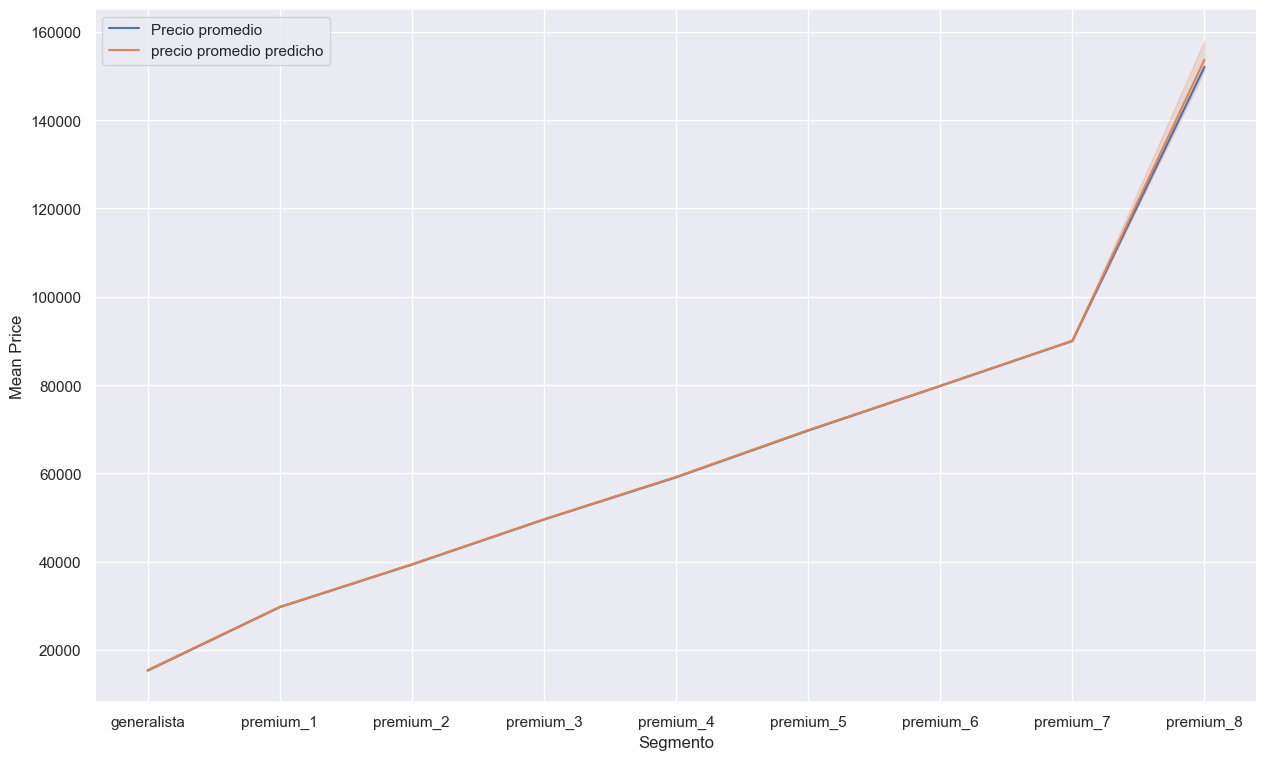

In [38]:
# Grafico de compartamiento vector objetivo Price Promedio v/s Price predicho Promedio, para todos los segmentos

fig, ax = plt.subplots(figsize = (15, 9))
sns.lineplot(x = "Segmento", y = "Mean Price", data = df_Predict, label = "Precio promedio")
sns.lineplot(x = "Segmento", y = "Promedio prediccion", data = df_Predict, label = "precio promedio predicho")


In [39]:
df_filter_values = df_min_mae[['Modelo','Filas']]
df_filter_values.groupby('Modelo').sum()

,Filas
Modelo,
BaggingRegressor,676
GradientBoostingRegressor,381
RandomForestRegressor,616111


## Serializacion Mejor Modelo Segun Segmento

In [40]:
#diccionario con modelos

list_model_result

{'GradientBoostingRegressor_generalista': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_1': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_2': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_3': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_4': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_5': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_6': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_7': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_8': GradientBoostingRegressor(random_state=11238),
 'RandomForestRegressor_generalista': RandomForestRegressor(random_state=11238),
 'RandomForestRegressor_premium_1': RandomForestRegressor(random_state=11238),
 'RandomForestRegressor_premium_2': RandomForestRegress

In [41]:
#buscar modelo en diccionario segun df_min_mae

dict_min_mae = dict()
for i, row in df_min_mae[['Modelo Segmento']].iterrows():
    dict_min_mae.update({k:v for (k,v) in list_model_result.items() if k == row.values[0]})
    

#dict_min_mae

#res = {k: v for k, v in list_model_result.items() if k.startswith('GradientBoostingRegressor')}
for index, (k,v) in enumerate(dict_min_mae.items()):
    #print(k)
    #pickle.dump(v, open(f'.\modelos\{k}.sav', 'wb'))
    pickle.dump(v, open(f'.\streamlit\modelos_serializados\{k}.sav', 'wb'))